<span style="color:#51a2d6; font-size:24px; font-weight:700"> K-Means Clustering</span>

In this practice, we will apply the k-means algorithm to the same toy data sets we have 
created for the previous module. 
We will see how k-means algorithm behaves for different densities of data.

'data.frame':	150 obs. of  3 variables:
 $ X    : num  4.92 2.2 2.38 4.37 2.08 ...
 $ Y    : num  3.31 2.76 2.27 2.68 2.19 ...
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...


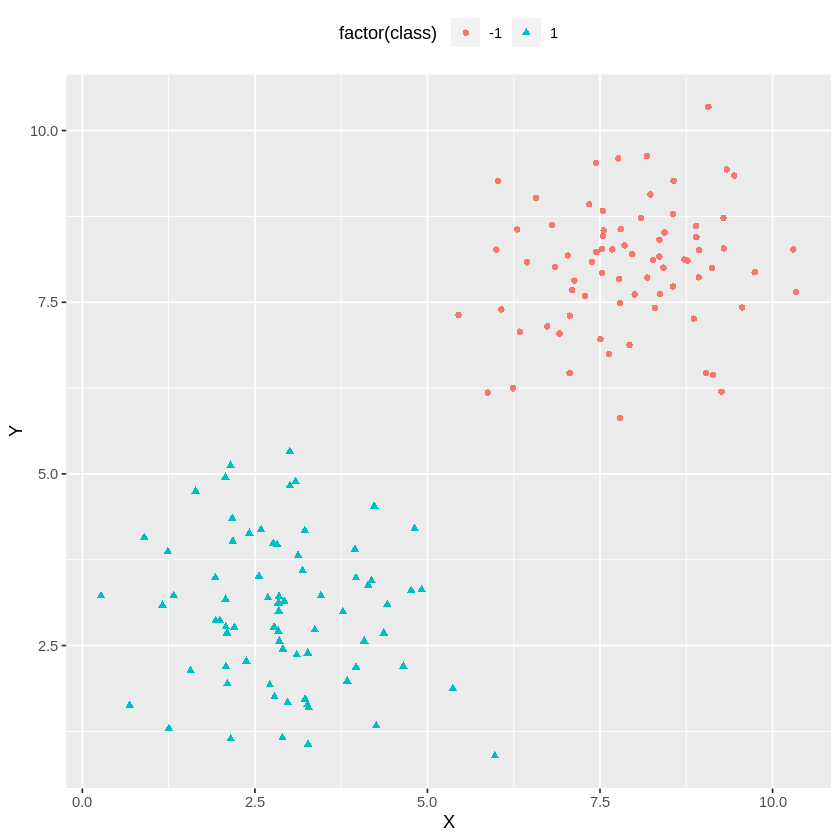

In [1]:
# read data from the file
points_data1 <- read.csv("/dsa/data/all_datasets/toydata/data1.csv",header=TRUE)

str(points_data1)
# Visualize the data
library(ggplot2)
plot1 <- ggplot(points_data1, aes(X, Y)) + geom_point(aes(color=factor(class),shape=factor(class))) + theme(legend.position="top")
plot1

Here, we plotted the data with the given classes as before. 
But we will assume we don't know the classes, 
because **clustering** is one of the *unsupervised* learning approaches; 
we look at the data without the class information now.

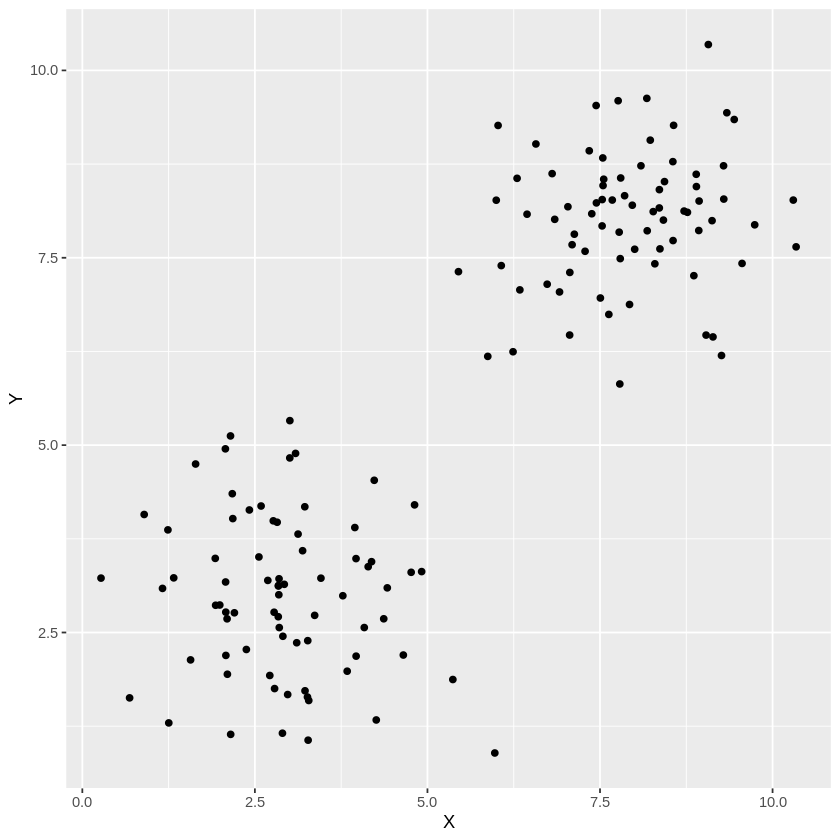

In [2]:
plot1 <- ggplot(points_data1, aes(X, Y)) + geom_point(color="black")
plot1

In [3]:
# Let's apply K-Means to this data set; when we plot the data we see clearly there are two clusters; so 
# let's start with two. 
set.seed(42)
kmeans_clust_1a <- kmeans(points_data1[, 1:2], 2, nstart = 20)
kmeans_clust_1a

K-means clustering with 2 clusters of sizes 75, 75

Cluster means:
         X        Y
1 2.920857 2.989449
2 7.918329 8.011722

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 172.3224 146.3325
 (between_SS / total_SS =  85.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    -1  1
  1  0 75
  2 75  0

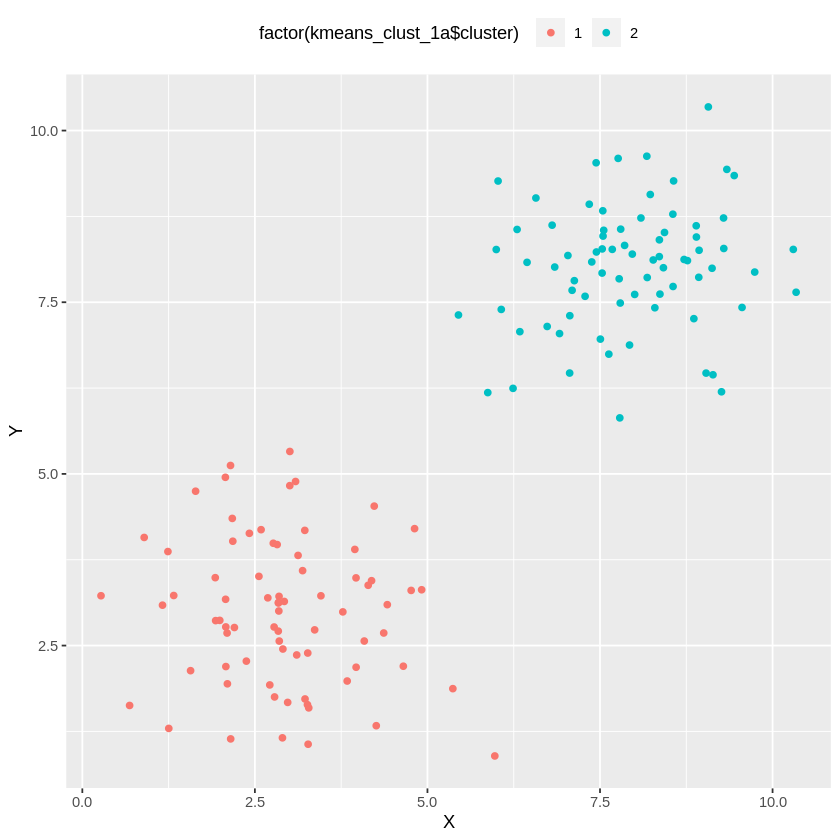

In [4]:
# Let's compare the cluster assignments to the actual class labels, and plot the data with the k-means 
# cluster labels
table(kmeans_clust_1a$cluster, points_data1$class)
plot_1a <- ggplot(points_data1, aes(X, Y)) + geom_point(aes(color = factor(kmeans_clust_1a$cluster))) + 
    theme(legend.position = "top")
plot_1a

As we can see, k-means does a good job in this simple data set. 
Again, remember that we tell the algorithm how many clusters there are. 
And we know that because we can visualize the data and have an idea about the clusters. 
If we couldn't do that, we would have to make up a number and try different numbers of 
clusters until we feel we have the right number. 
Let's try the k-means with a different number of clusters.

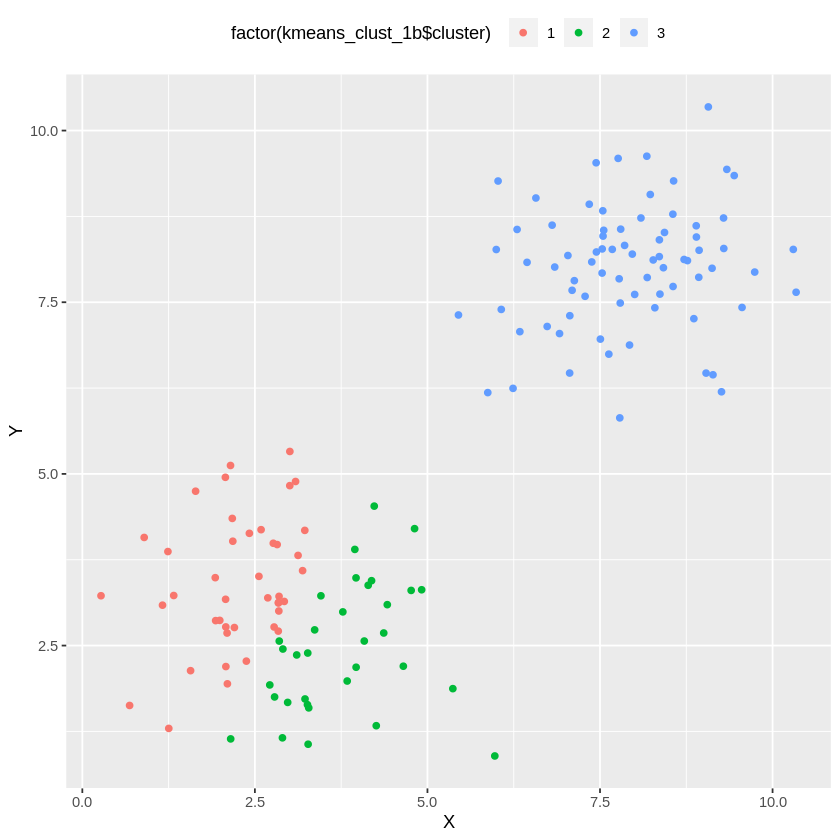

In [5]:
# try 3 clusters
kmeans_clust_1b <- kmeans(points_data1[, 1:2], 3, nstart = 20)
plot_1b <- ggplot(points_data1, aes(X, Y)) + geom_point(aes(color = factor(kmeans_clust_1b$cluster))) + 
    theme(legend.position = "top")
plot_1b

K-means created this somewhat of an unnatural clustering because we asked to have three clusters. 
The main drawback of the k-means algorithm is that we need to have a good idea of number of 
clusters to begin with. 

Let's apply it to the second data set.

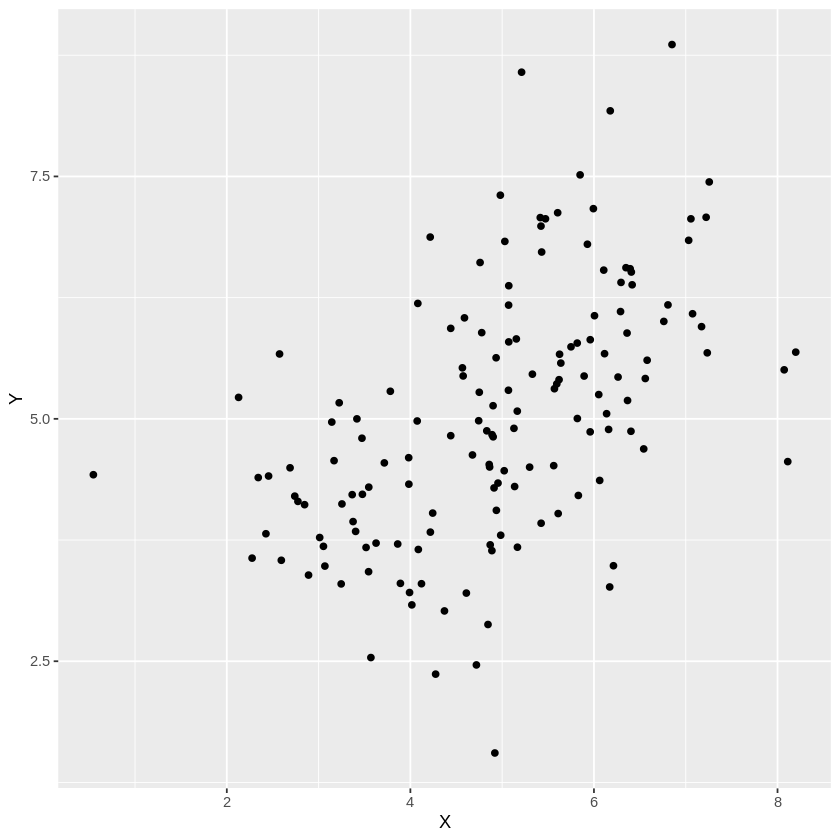

In [6]:
# read data from the file 
points_data2 <- read.csv("/dsa/data/all_datasets/toydata/data2.csv", header = TRUE)

# Visualize the data
plot2 <- ggplot(points_data2, aes(X, Y)) + geom_point(color = "black")
plot2

Let's start with two clusters.

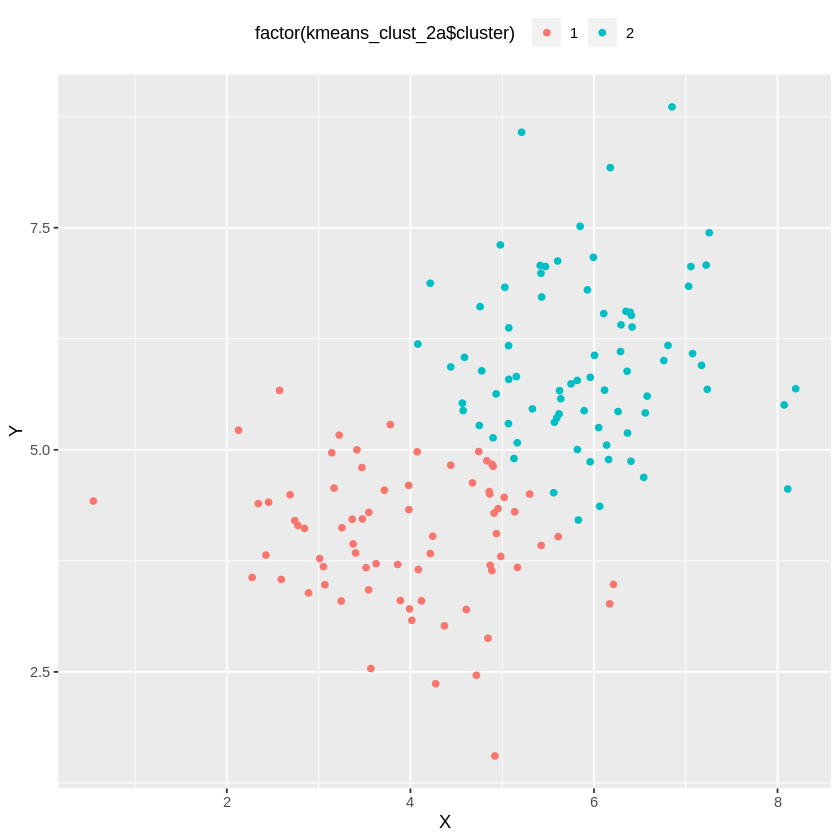

In [7]:
# try 2 clusters
kmeans_clust_2a <- kmeans(points_data2[, 1:2], 2, nstart = 20)
plot_2a <- ggplot(points_data2, aes(X, Y)) + geom_point(aes(color = factor(kmeans_clust_2a$cluster))) + 
    theme(legend.position = "top")
plot_2a

Let's  see how well it does; compute the confusion given the actual labels. **Now it's your turn:**

In [8]:
table(kmeans_clust_2a$cluster, points_data2$class)

   
    -1  1
  1  5 68
  2 70  7

K-means does a pretty good job given that the clusters in this data set are overlapped. Let's try with different numbers. **Now it's your turn:**

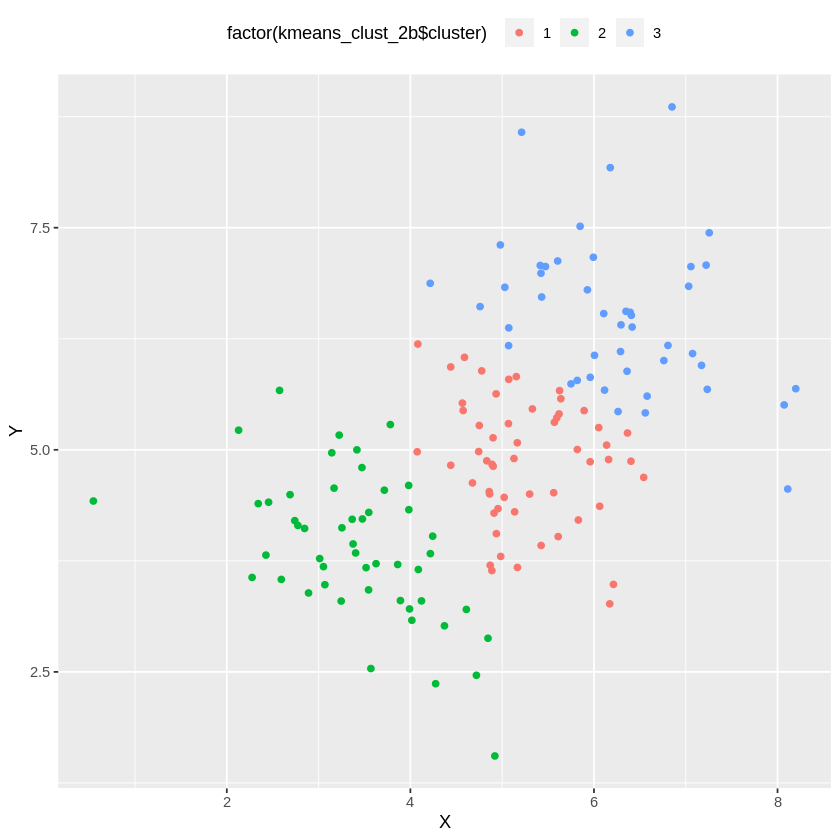

In [10]:
# try 3 clusters
kmeans_clust_2b <- kmeans(points_data2[, 1:2], 3, nstart = 20)
plot_2b <- ggplot(points_data2, aes(X, Y)) + geom_point(aes(color = factor(kmeans_clust_2b$cluster))) + 
    theme(legend.position = "top")
plot_2b

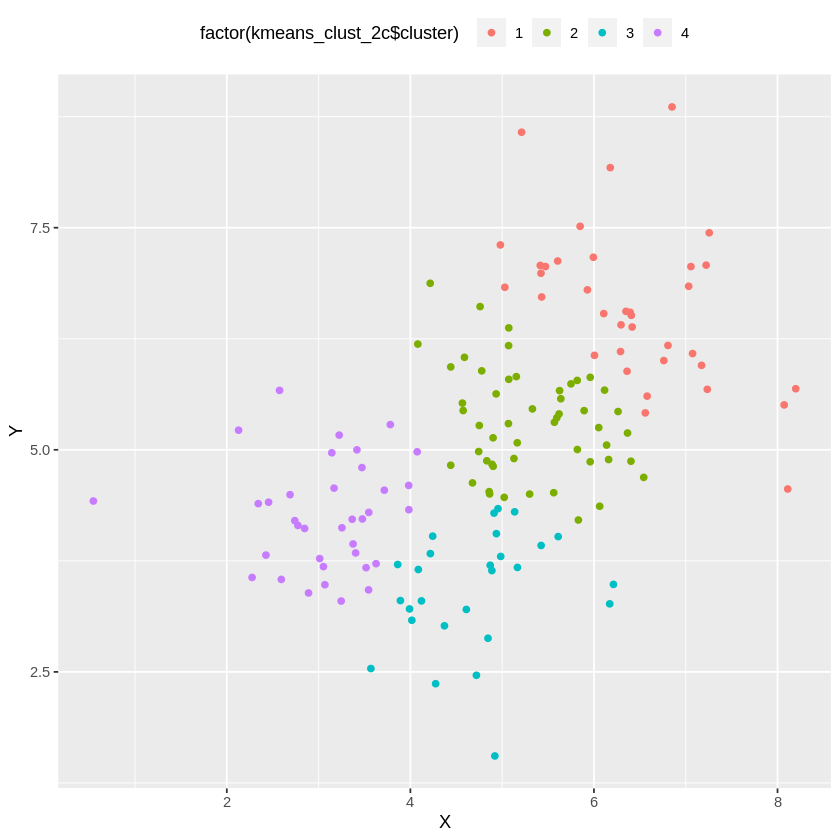

In [11]:
# try 4 clusters
kmeans_clust_2c <- kmeans(points_data2[, 1:2], 4, nstart = 20)
plot_2c <- ggplot(points_data2, aes(X, Y)) + geom_point(aes(color = factor(kmeans_clust_2c$cluster))) + 
    theme(legend.position = "top")
plot_2c

We can do a similar visualization by using the *fviz_cluster* function from 
**factoextra** library that has useful functions to deal with clustering related programming.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


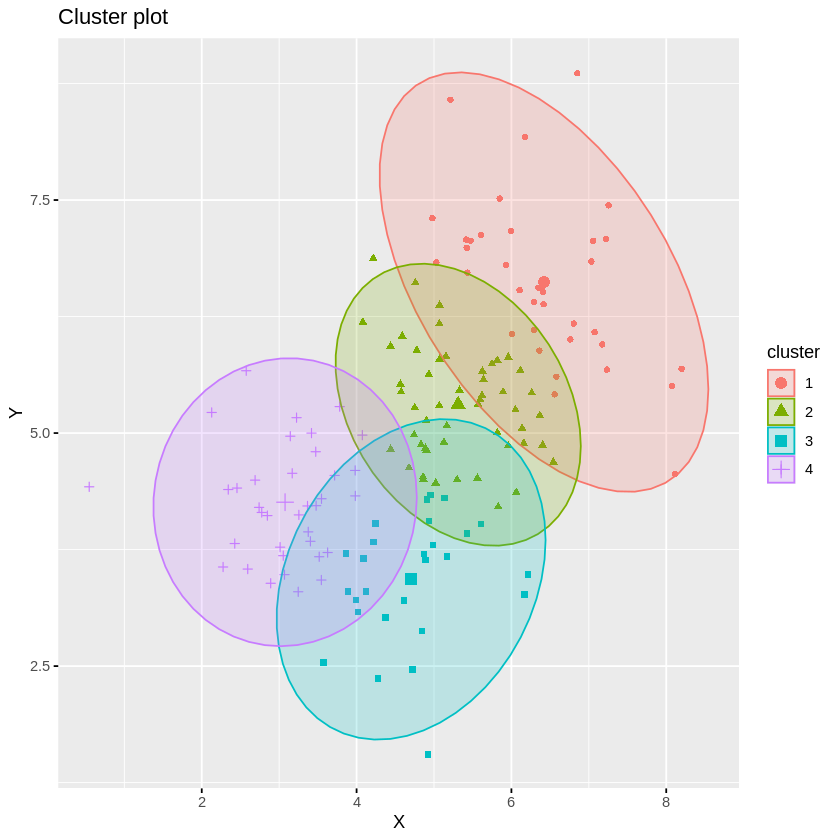

In [12]:
library(factoextra)
# visualize clusters and fit an ellipse 
fviz_cluster(kmeans_clust_2c, data = points_data2[, 1:2], geom = "point", stand = FALSE, frame.type = "norm")

There is really no right or wrong answer here; some of these clusters look *OK*, they do not look unnatural. So is there a way of finding an **optimal** number of clusters? 

One method is to run the clustering algorithm for different values of k such as by varying k from 1 to 10 clusters, 
and for each k, calculate the total within-cluster sum of square (wss) and plot the curve of wss 
according to the number of clusters k.
The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

**Please review** the cluster analysis lab for more information.

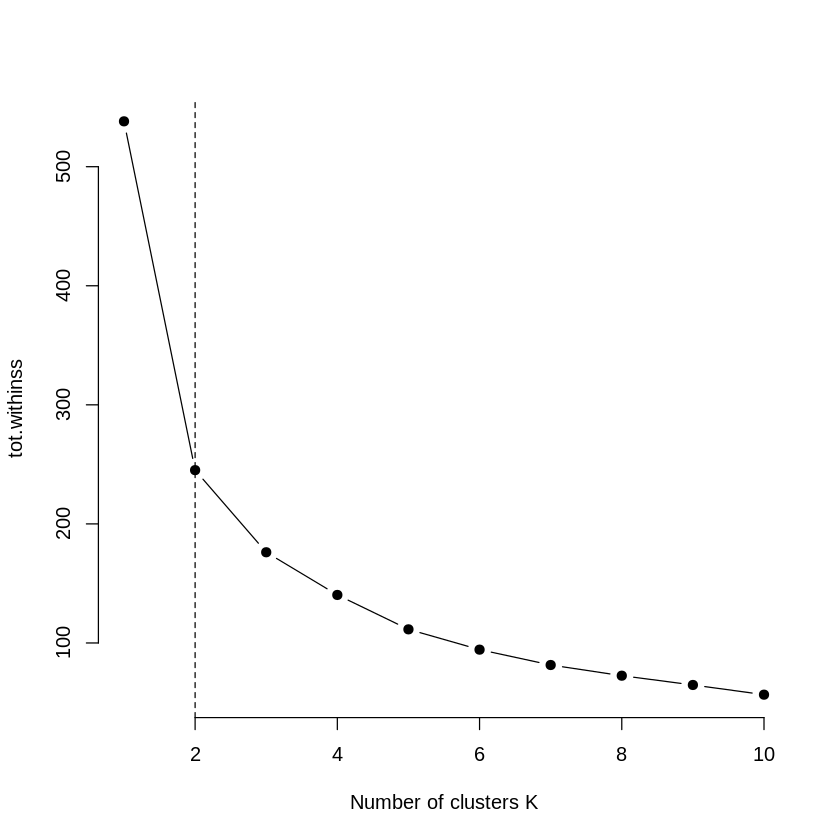

In [13]:
# Compute and plot wss for k = 1 to k = 10
max_clusters <- 10 # Maximal number of clusters

# grab the data 
data <- points_data2[, 1:2]

# apply different values of k to kmeans function and collect tot.withinss for each k. 
# tot.withinss : Total within-cluster sum of squares
wss <- sapply(1:max_clusters, function(k){kmeans(data, k, nstart = 20 )$tot.withinss})

# plot k versus tot.withinss
plot(1:max_clusters, wss, type = "b", pch = 19, frame = FALSE, xlab = "Number of clusters K", ylab = "tot.withinss")

# visually, 2 seems to be a good number for clusters.
abline(v = 2, lty = 2)

This is just one of the possible ways we can evaluate the best number of clusters. 
We can compute a number of measures by using the **NbClust** library, 
and pick the number of clusters that is suggested by the majority of all different measures it computes.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


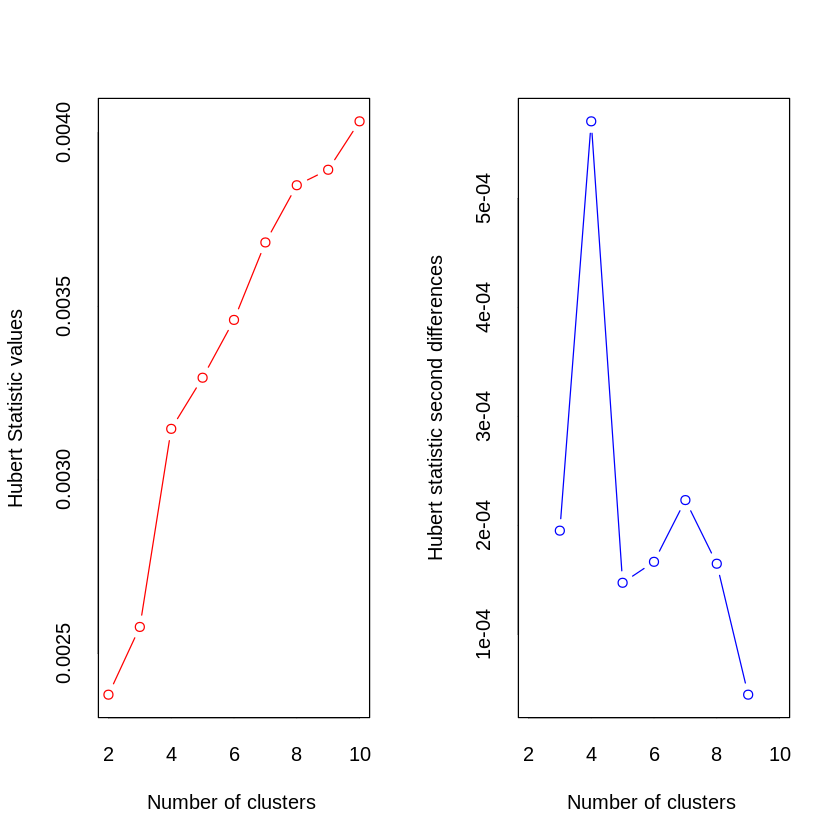

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 3 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


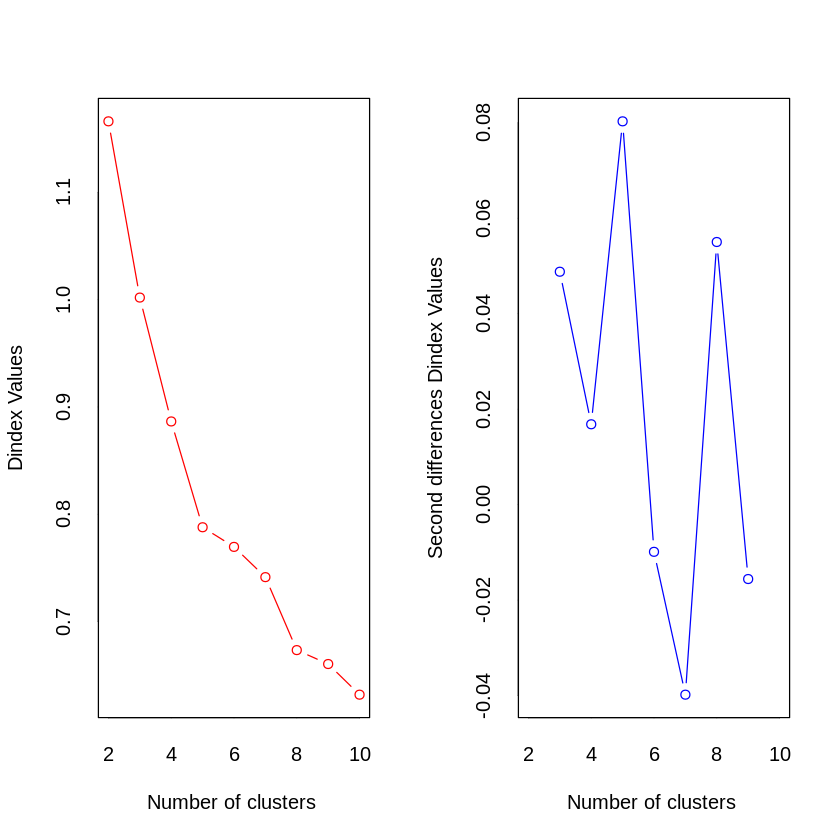

In [14]:
library(NbClust)
nb <- NbClust(data, distance="euclidean", min.nc=2, max.nc=10, method="complete", index="all")

It also tells us the best number of clusters to be two. 
Let's look at the different methods and their suggested number of clusters.

In [15]:
nb$Best.nc

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,⋯,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,9.0000,2.0000,5.0000,2.0000,3.0000,8.00,3.00,5.0000,8.0000,8.0000,⋯,2.0000,3.0000,2.0000,2.0000,2.0000,10.0000,0,3.0000,0,10.000
Value_Index,5.8993,163.7424,37.4485,25.9155,79.4882,31902.23,11256.08,30.5646,29.8737,-13.0783,⋯,0.5132,62.9161,0.5587,1.2574,0.5343,0.0592,0,1.6122,0,0.331


Again, it seems most of them suggest cluster number to be two. 
We can also visualize the nbclust result using the factoextra library's fviz_nbclust() function:

Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") {:
“the condition has length > 1 and only the first element will be used”


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 10 proposed  2 as the best number of clusters
* 4 proposed  3 as the best number of clusters
* 1 proposed  4 as the best number of clusters
* 2 proposed  5 as the best number of clusters
* 3 proposed  8 as the best number of clusters
* 1 proposed  9 as the best number of clusters
* 3 proposed  10 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  2 .



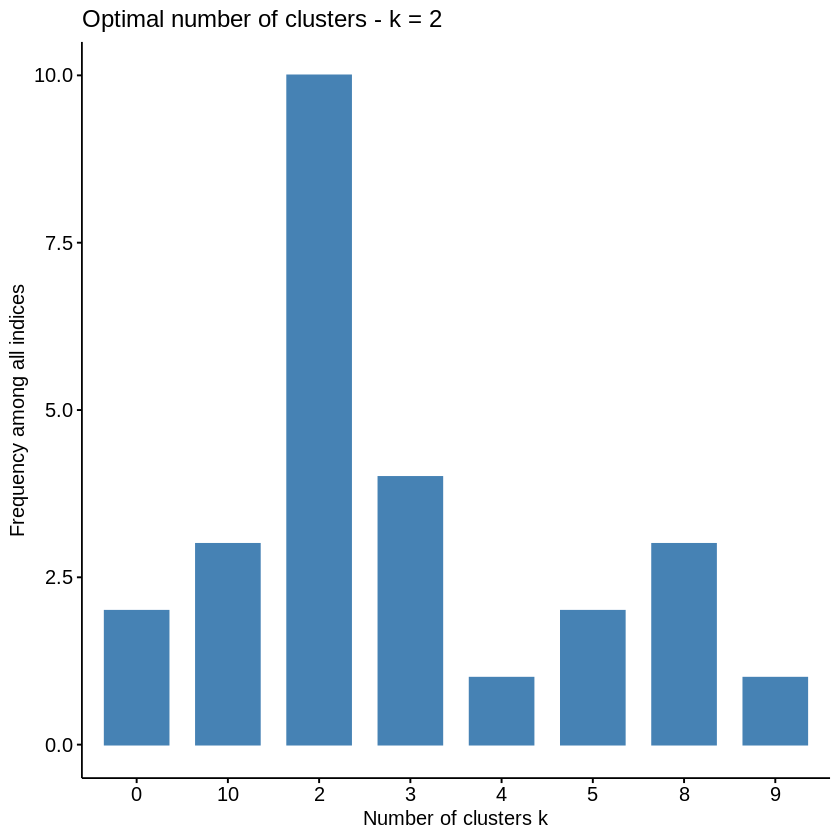

In [16]:
fviz_nbclust(nb)

Let's try the same approach for the third data set. 
From previous module, we know that this data set was produced by creating six normally distributed clusters. 
Let's see if we can find the best number of clusters. 

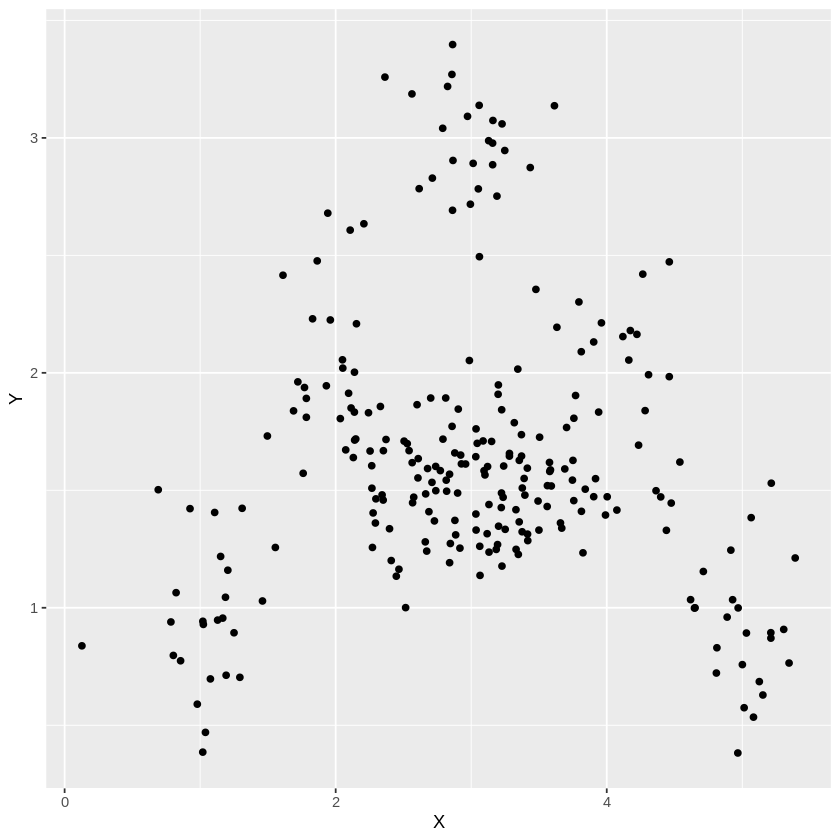

In [17]:
# read data from file
points_data3 <- read.csv("/dsa/data/all_datasets/toydata/data3.csv", header = TRUE)
plot_3 <- ggplot(points_data3, aes(X, Y)) + geom_point(color = "black")
plot_3

First, try a few random numbers. 
Start with 4. 
## <span style="background:yellow">YOUR TURN</span>

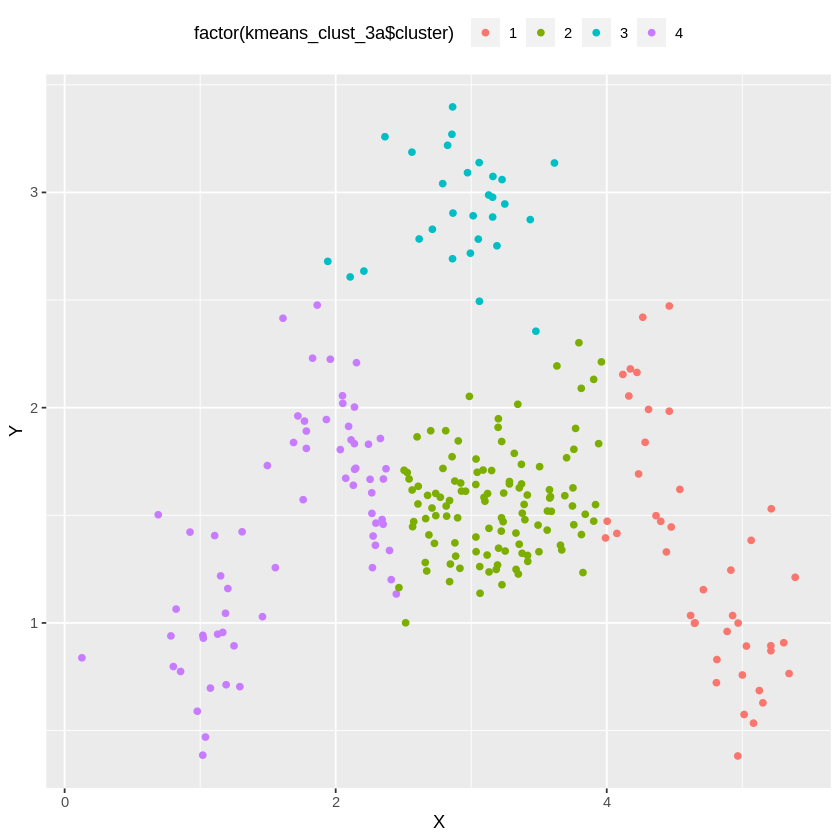

In [18]:
# try 4 clusters
kmeans_clust_3a <- kmeans(points_data3[, 1:2], 4, nstart = 20)
plot_3a <- ggplot(points_data3, aes(X, Y)) + geom_point(aes(color = factor(kmeans_clust_3a$cluster))) + 
    theme(legend.position = "top")
plot_3a

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


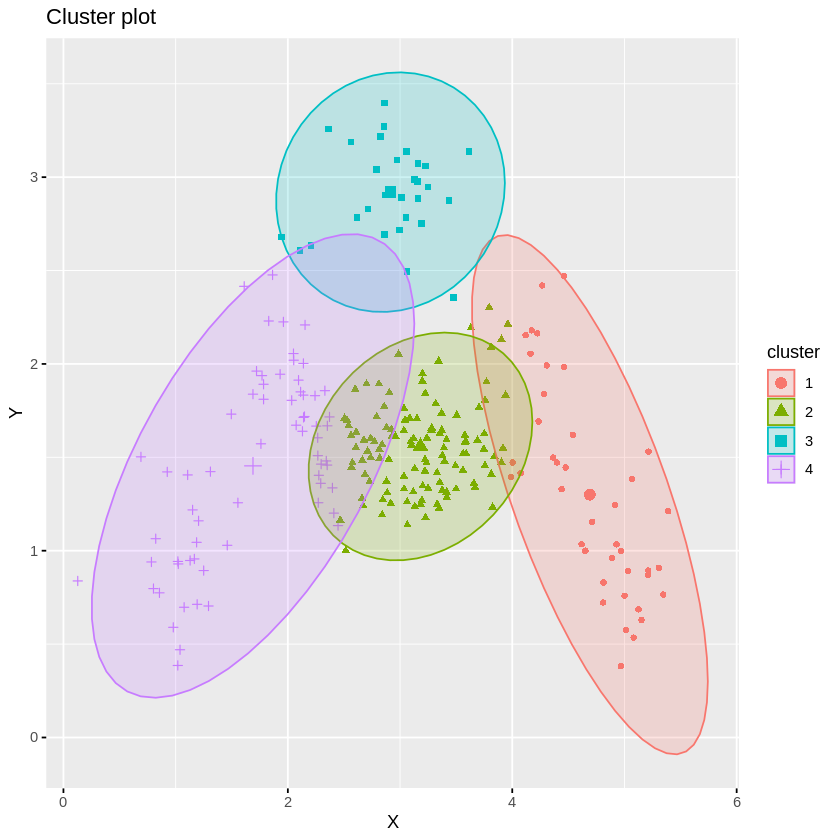

In [19]:
# Let's plot with the fviz_cluster function
fviz_cluster(kmeans_clust_3a, data = points_data3[, 1:2], geom = "point", stand = FALSE, frame.type = "norm")

Now, let's run the NbClust to find out the best number of clusters. 

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


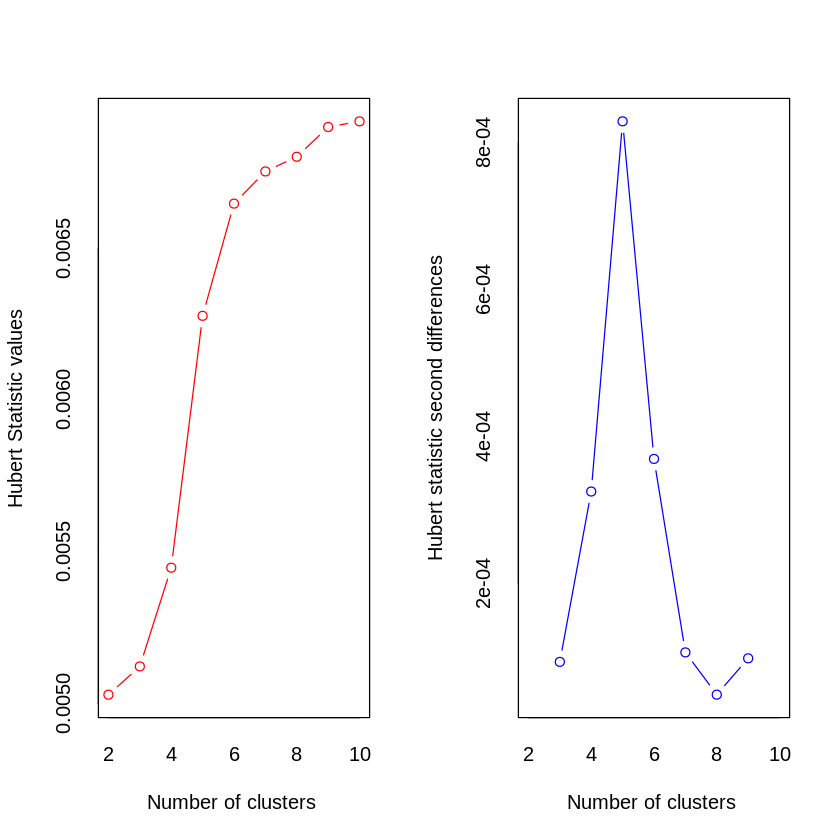

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 7 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 6 proposed 6 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


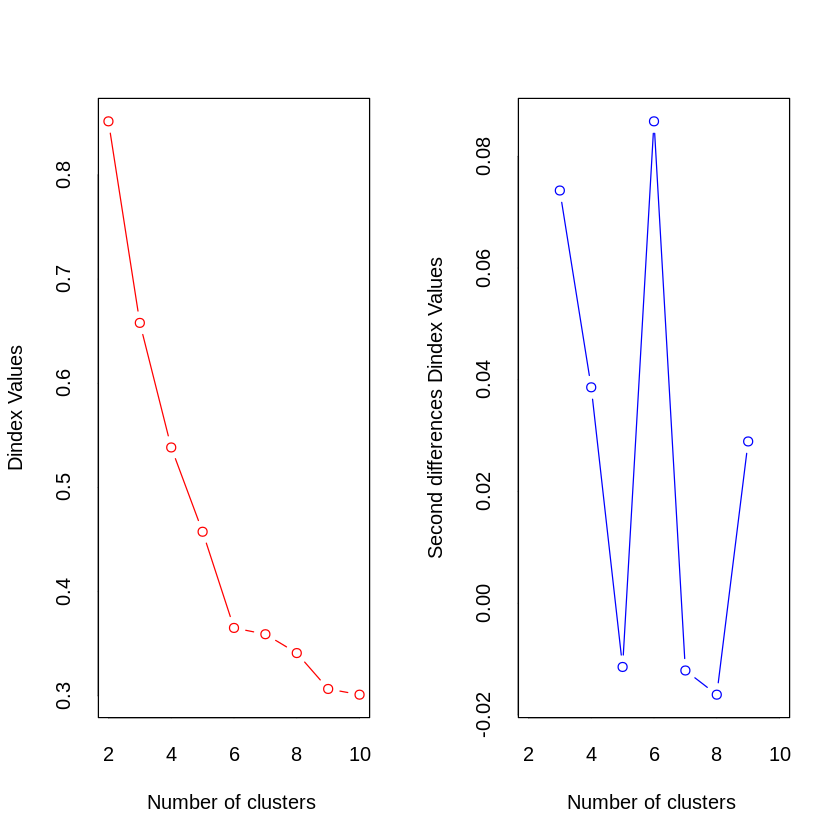

In [20]:
nb3 <- NbClust(points_data3[, 1:2], distance="euclidean", min.nc=2, max.nc=10, method="complete", index="all")

Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") {:
“the condition has length > 1 and only the first element will be used”


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 5 proposed  2 as the best number of clusters
* 7 proposed  3 as the best number of clusters
* 3 proposed  4 as the best number of clusters
* 2 proposed  5 as the best number of clusters
* 6 proposed  6 as the best number of clusters
* 1 proposed  10 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



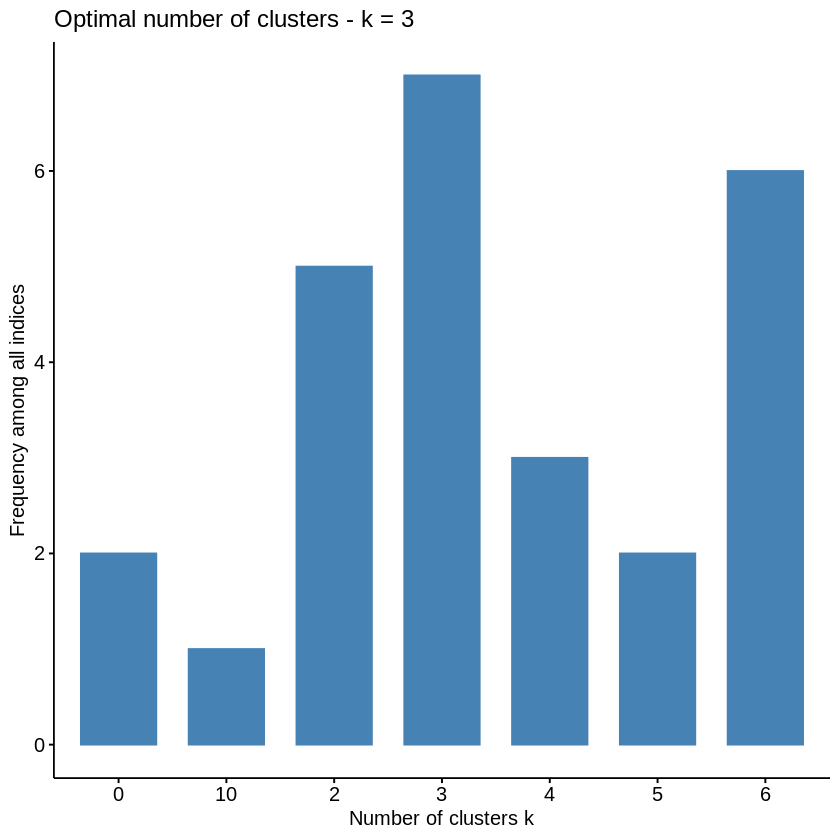

In [21]:
#Let's visualize it with fviz_nbclust
fviz_nbclust(nb3)

This is interesting. 
Most of the methods suggest 3 as the number of clusters, but 6 is a very close second, 
and we know 6 should be the "right" answer. 
By looking at this plot and the actual clusters, 
we can decide whether this data set should be analyzed by separating it to 3 clusters or 6 clusters. 
Now, let's find the clusters and plot them. 

## <span style="background:yellow">YOUR TURN</span>

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


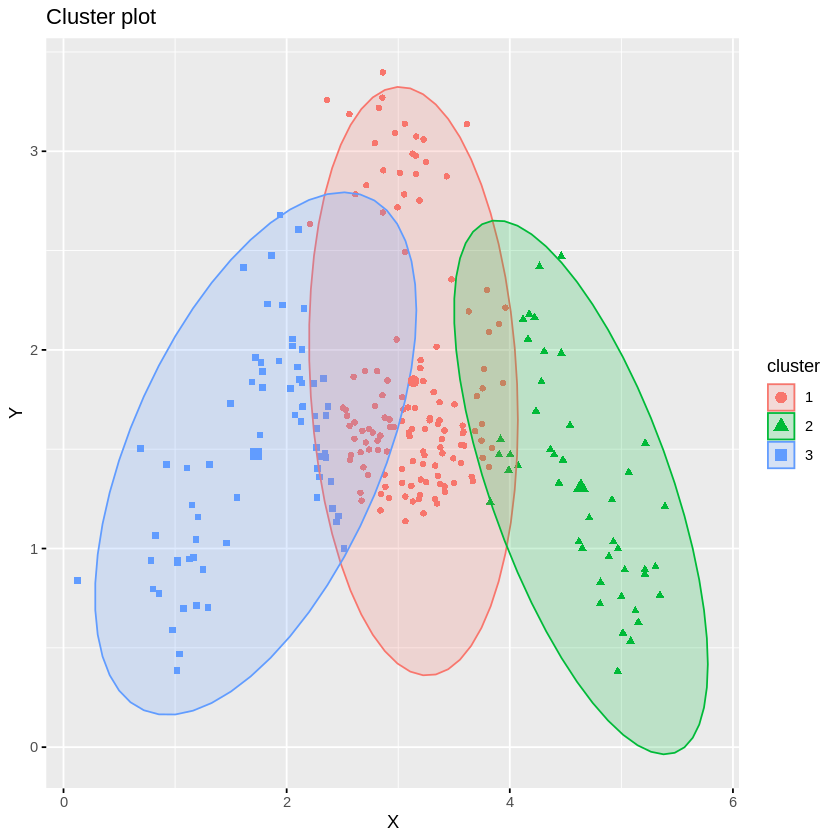

In [24]:
# apply k-means to data3 for three clusters 
kmeans_clust_3b <- kmeans(points_data3[, 1:2], 3, nstart = 20)
# plot the clusters with fviz_cluster
fviz_cluster(kmeans_clust_3b, data = points_data3[, 1:2], geom = "point", stand = FALSE, frame.type = "norm")

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


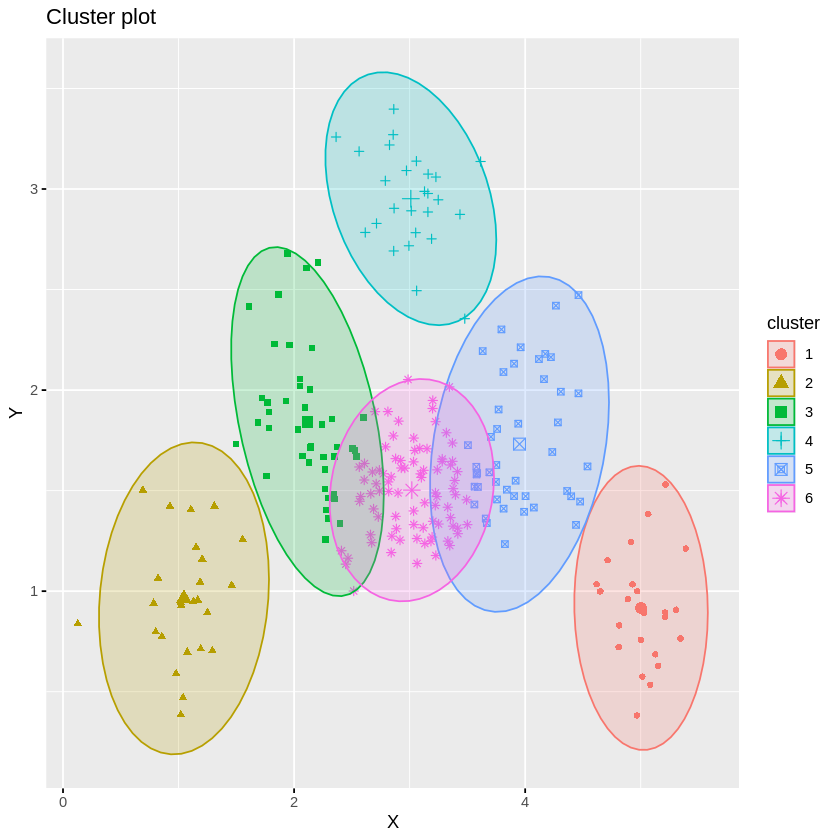

In [26]:
# apply k-means to data3 for six clusters 
kmeans_clust_3c <- kmeans(points_data3[, 1:2], 6, nstart = 20)
# plot the clusters with fviz_cluster
fviz_cluster(kmeans_clust_3c, data = points_data3[, 1:2], geom = "point", stand = FALSE, frame.type = "norm")

Both results seem to be fine. 
If we want to analyze the data in a coarser scale, we can pick 3 as the number of clusters, 
otherwise we can pick 6 for finer scale. 

# Save your notebook!